# Problem Statement - (Recommendation - Popularity and Collabarative Model)
Build your own recommendation system for products on an e-commerce website like Amazon.com.

Dataset columns - first three columns are userId, productId, and ratings and the fourth column is
timestamp. You can discard the timestamp column as in this case you may not need to use it.
Source - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) The repository has
several datasets. For this case study, we are using the Electronics dataset.
Please do the analysis based on steps( 1 to 8) as given below -
# Steps followed:
1. Read and explore the given dataset. ( Rename column/add headers, plot histograms,
find data characteristics)
2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the
users only who has given 50 or more number of ratings )
3. Build Popularity Recommender model.
4. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)
5. Build Collaborative Filtering model.
6. Evaluate the above model. ( Once the model is trained on the training data, it can be
used to compute the error (like RMSE) on predictions made on the test data.) You can
also use a different method to evaluate the models.
7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to
each user based on his/her habits, we will recommend 5 new products.
8. Insights summarization.

In [3]:
pip install scikit-surprise

     |████████████████████████████████| 6.5MB 4.3MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1678229 sha256=c5a9f03d7fa74534fa5b6aac8dc8a8989cb8ea6280d9c9d62f68bde9541c9a2a
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [5]:
import os
import numpy as np  
import pandas as pd
import seaborn as sns
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
df_Electrnoic = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/ratings_Electronics.csv", names=['User-Id', 'Product-Id', 'Ratings', 'Time-stamp'])

In [7]:
df_Electrnoic.head(10)

,User-Id,Product-Id,Ratings,Time-stamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


In [8]:
df_Electrnoic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
User-Id       object
Product-Id    object
Ratings       float64
Time-stamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [0]:
df_Electrnoic_small = df_Electrnoic.iloc[0:6000000,:]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3791197390>,
      dtype=object)

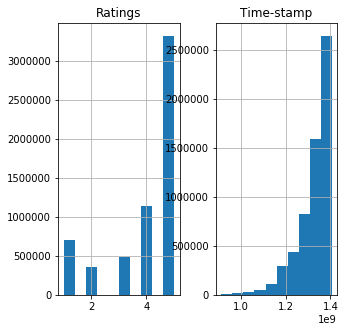

In [183]:
df_Electrnoic_small.hist(figsize =(5,5),bins=10)

In [0]:
#The distribution of the ratings in the data-set. For 20000 users 
#1. Total 5 ratings is more than 3000000 and so on. Similarly (1 - 4) ratings distribution .

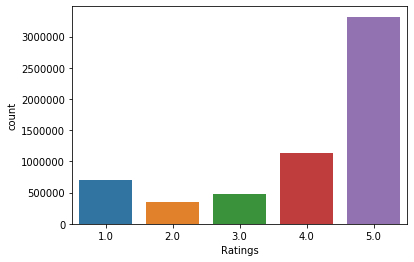

In [185]:
sns.countplot(df_Electrnoic_small['Ratings'])

In [186]:
df_Electrnoic_small.drop('Time-stamp', axis = 1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [187]:
df_Electrnoic_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 3 columns):
User-Id       object
Product-Id    object
Ratings       float64
dtypes: float64(1), object(2)
memory usage: 137.3+ MB


In [188]:
df_Electrnoic_small['Ratings'].unique()

array([5., 1., 3., 2., 4.])

In [189]:
df_Electrnoic_small['Ratings'].value_counts()

5.0    3319563
4.0    1141505
1.0     704681
3.0     482140
2.0     352111
Name: Ratings, dtype: int64

In [0]:
EDF_Filter=df_Electrnoic_small.groupby("User-Id").filter(lambda x:len(x)>50)

In [191]:
EDF_Filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66188 entries, 118 to 5999623
Data columns (total 3 columns):
User-Id       66188 non-null object
Product-Id    66188 non-null object
Ratings       66188 non-null float64
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


In [192]:
EDF_Filter['Ratings'].value_counts()

5.0    37301
4.0    16611
3.0     6271
2.0     3013
1.0     2992
Name: Ratings, dtype: int64

In [193]:
EDF_Filter.groupby('Product-Id')['Ratings'].mean().head()

Product-Id
0594481813    3.0
0970407998    2.5
0972683275    5.0
1400501466    3.0
1400501520    5.0
Name: Ratings, dtype: float64

In [194]:
EDF_Filter.groupby('Product-Id')['Ratings'].count().sort_values(ascending=False).head()

Product-Id
B003ES5ZUU    116
B007WTAJTO     93
B002R5AM7C     93
B000N99BBC     93
B002V88HFE     74
Name: Ratings, dtype: int64

In [195]:
EDF_Filter.groupby('Product-Id')['Ratings'].mean().sort_values(ascending = False).head(10)

Product-Id
B0080E1SIQ    5.0
B002WJ9S6Y    5.0
B002WSPHBA    5.0
B002WSPAKI    5.0
B000BGOSRE    5.0
B000BGZMSI    5.0
B002WRGD96    5.0
B002WR7VSS    5.0
B002WQFWTY    5.0
B000BGZMTC    5.0
Name: Ratings, dtype: float64

In [0]:
rating_mean = pd.DataFrame(df_Electrnoic_small.groupby('Product-Id')['Ratings'].mean().sort_values(ascending = False))

In [197]:
rating_mean

,Ratings
Product-Id,
B0032GTN02,5.0
B003L0TVJM,5.0
B003KZ3VDU,5.0
B003KZJEG8,5.0
B003L0PUCE,5.0
...,...
B007I58NAY,1.0
B007I5963M,1.0
B0000AEGBL,1.0


In [198]:
rating_mean['rating_counts'] = pd.DataFrame(df_Electrnoic_small.groupby('Product-Id')['Ratings'].count())
rating_mean

,Ratings,rating_counts
Product-Id,,
B0032GTN02,5.0,3
B003L0TVJM,5.0,2
B003KZ3VDU,5.0,1
B003KZJEG8,5.0,2
B003L0PUCE,5.0,1
...,...,...
B007I58NAY,1.0,1
B007I5963M,1.0,1
B0000AEGBL,1.0,1


In [199]:
mean_rating_value = np.mean(rating_mean.Ratings.values)
mean_rating_value

3.8787481924329255

In [0]:
min_votes = 5
def weighted_rating(rating_mean_count, min_votes, mean_rating_dataset):
    weighted_rating = list()
    V = rating_mean_count.rating_counts.values
    R = rating_mean_count.Ratings.values
    for v, r in zip(V, R):
        if v < 5:
            weighted_rating.append(0)
        else:
            weighted_rating.append((v/(v+min_votes))*r + (min_votes/(v+min_votes))*mean_rating_dataset)
    return(weighted_rating)

In [0]:
rating_mean['weighted_rating'] = weighted_rating(rating_mean, min_votes, mean_rating_value)

In [202]:
rating_mean

,Ratings,rating_counts,weighted_rating
Product-Id,,,
B0032GTN02,5.0,3,0.0
B003L0TVJM,5.0,2,0.0
B003KZ3VDU,5.0,1,0.0
B003KZJEG8,5.0,2,0.0
B003L0PUCE,5.0,1,0.0
...,...,...,...
B007I58NAY,1.0,1,0.0
B007I5963M,1.0,1,0.0
B0000AEGBL,1.0,1,0.0


In [203]:
rating_mean.weighted_rating.sort_values(ascending = False).head(10)

Product-Id
B000053HC5    4.914583
B0043ZLFXE    4.898881
B0033PRWSW    4.888760
B007SZ0E1K    4.884127
B004I763AW    4.882981
B002E6R7NG    4.882031
B0000DYV9H    4.881404
B0043WJRRS    4.879378
B003J9QQWU    4.875307
B000TMFYBO    4.875272
Name: weighted_rating, dtype: float64

In [0]:
from surprise import Reader
from surprise import SVD
from collections import defaultdict

In [0]:
def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [0]:
reader = Reader()

In [0]:
data = Dataset.load_from_df(EDF_Filter[["User-Id","Product-Id","Ratings"]],reader)

In [0]:
trainset, testset = train_test_split(data, test_size=.3)

In [209]:
model_svd = SVD()
model_svd.fit(trainset)

In [0]:
predict = model_svd.test(testset)

In [211]:
# get RMSE
print("Item-based Model for SVC : Test Set")
accuracy.rmse(predict, verbose=True)

Item-based Model for SVC : Test Set
RMSE: 1.0179


1.0179070778608221

In [212]:
top_n = get_top_n(predict, n=5)
top_n

defaultdict(list,
            {'A100UD67AHFODS': [('B002Y6CJJ8', 4.926618946277879),
              ('B00483WRZ6', 4.621435380957467),
              ('B000069JWX', 4.613608410566473),
              ('B003O8682Y', 4.611945129776104),
              ('B005OA3BSY', 4.516038581255567)],
             'A100WO06OQR8BQ': [('B0002L5R78', 4.313497616608696),
              ('B0002LEMWE', 4.309149061414421),
              ('B003XM73P2', 4.270813581631416),
              ('B003ES5ZUU', 4.252183003129121),
              ('B00030DEQE', 4.249826501886242)],
             'A105TOJ6LTVMBG': [('B000ENUCR4', 4.3255269007645705),
              ('B004W2JKWG', 4.272477441651774),
              ('B000065BP9', 4.213717631908954),
              ('B0019WF4FE', 4.149996071587076),
              ('B0001MQUOC', 4.124712235156252)],
             'A10NMELR4KX0J6': [('B002AJMHMI', 4.493767243592526),
              ('B002WE0QN8', 4.171879341993431),
              ('B002TLT07W', 4.120931640734546),
              ('B00404JF

In [213]:
model_KNN = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': True})
model_KNN.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [0]:
predict = model_KNN.test(testset)

In [215]:
# get RMSE
print("Item-based Model for KNN : Test Set")
accuracy.rmse(predict, verbose=True)

Item-based Model for KNN : Test Set
RMSE: 1.1038


1.103822413038567

In [216]:
top_n = get_top_n(predict, n=5)
top_n

defaultdict(list,
            {'A100UD67AHFODS': [('B003O8682Y', 5),
              ('B005OA3BSY', 5),
              ('B00004Z5M1', 4.97995972883379),
              ('B002Y6CJJ8', 4.7682450470056095),
              ('B00483WRZ6', 4.616108643547238)],
             'A100WO06OQR8BQ': [('B00030DEQE', 4.850164587664588),
              ('B001NLV4TQ', 4.735714285714286),
              ('B0002LEMWE', 4.643817204301075),
              ('B001AW8W7A', 4.437820901556499),
              ('B0042FZ50O', 4.43193609175236)],
             'A105TOJ6LTVMBG': [('B004W2JKWG', 4.555659903236244),
              ('B002RM08RE', 4.543430099312452),
              ('B000SEN9U6', 4.538454161871883),
              ('B00182CIB8', 4.425979212991987),
              ('B001MX5YWI', 4.418742368742368)],
             'A10NMELR4KX0J6': [('B002WE0QN8', 4.913141685160343),
              ('B002RL875A', 4.672239972296689),
              ('B002BH3UA2', 4.551275510204082),
              ('B00483WRZ6', 4.525200141305277),
         

Took both SVD and KNN approach for findind the top 5 recommendations.
The RMSE for SVD is better than KNN. Hence SVD is the choice.